In [1]:
import pandas as pd
import gzip
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
#reading the Amazon JSON data 
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

#getting the first million observations    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1 
    if i == 1000000:
        break
  return pd.DataFrame.from_dict(df, orient='index')

#showing the contents of the reviews dataframe
df_reviews = getDF('reviews_Books.json.gz')
df_reviews.head()



,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,overall,reviewTime,summary
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...


In [3]:
#renaming column names for the df_Reviews dataframe
df_reviews = df_reviews.rename(columns={'overall': 'ReviewRating', 'summary': 'RevSummary'})
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,ReviewRating,reviewTime,RevSummary
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...


In [4]:
len(df_reviews)

1000000

In [4]:
##showing the contents of the Meta dataframe
df_meta = getDF('meta_Books.json.gz')
df_meta.head()

,asin,salesRank,imUrl,categories,title,description,related,price,brand
0,0001048791,{u'Books': 6334800},http://ecx.images-amazon.com/images/I/51MKP0T4...,[[Books]],"The Crucible: Performed by Stuart Pankin, Jero...",None,None,NaN,None
1,0001048775,{u'Books': 13243226},http://ecx.images-amazon.com/images/I/5166EBHD...,[[Books]],Measure for Measure: Complete &amp; Unabridged,William Shakespeare is widely regarded as the ...,None,NaN,None
2,0001048236,{u'Books': 8973864},http://ecx.images-amazon.com/images/I/51DH145C...,[[Books]],The Sherlock Holmes Audio Collection,"&#34;One thing is certain, Sherlockians, put a...","{u'also_viewed': [u'1442300191', u'9626349786'...",9.26,None
3,0000401048,{u'Books': 6448843},http://ecx.images-amazon.com/images/I/41bchvIf...,[[Books]],The rogue of publishers' row;: Confessions of ...,None,{u'also_viewed': [u'068240103X']},NaN,None
4,0001019880,{u'Books': 9589258},http://ecx.images-amazon.com/images/I/61LcHUdv...,[[Books]],Classic Soul Winner's New Testament Bible,None,"{u'also_viewed': [u'B003HMB5FC', u'0834004593'...",5.39,None


In [5]:
#making sure the length is 1 million
len(df_meta)

1000000

In [5]:
#merging the meta dataframe with the reviews dataframe
df_reviews = df_reviews.merge(df_meta)
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,unixReviewTime,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",1019865600,Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",1395619200,The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",1031702400,I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",1383177600,It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]",1374883200,"We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None


In [6]:
#dropping unused columns
df_reviews = df_reviews.drop('unixReviewTime',1)
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",NaN,None
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None


In [7]:
#computing average rating for BOOKS
print sum(df_reviews.ReviewRating) / len(df_reviews.ReviewRating)

4.22772


In [7]:
#dropping observations without a userid
df_reviews = df_reviews.dropna(subset=['reviewerID','asin'])

In [8]:
df_reviews = df_reviews[df_reviews.reviewerID!= "None"]
len(df_reviews)

1000000

In [9]:
df_reviews = df_reviews[df_reviews.asin!= "None"]
len(df_reviews)

1000000

In [10]:
#computing average score of helpful rating
df_reviews['helpful-score'] = df_reviews['helpful'].str[-2].astype(float)
df_reviews['helpful-max'] = df_reviews['helpful'].str[1].astype(float)

print sum(df_reviews['helpful-score'])/sum(df_reviews['helpful-max'])

0.655648738786


In [11]:
#computing average price of all books
df_reviews['price'] = df_reviews['price'].fillna(0)
df_reviews['price'] = df_reviews['price'].astype(float)
print sum(df_reviews['price'])/len(df_reviews['price'])
print max(df_reviews['price'])
print min(df_reviews['price'])

8.74720563008
673.92
0.0


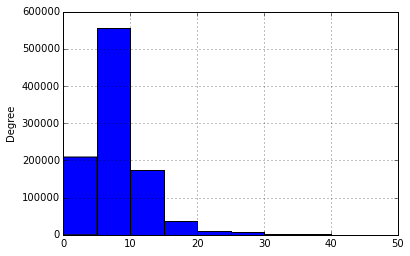

In [14]:
#price histogram removing outliers
t=df_reviews[df_reviews['price']<50]
t['price'].plot(kind='hist')

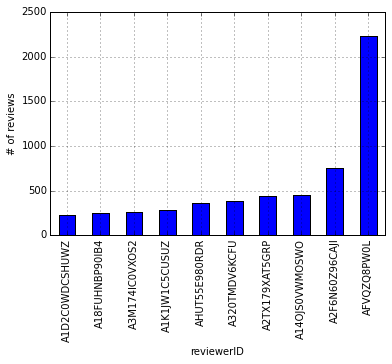

In [22]:
#Top 10 users posting the most reviews
freq_users = df_reviews.groupby(['reviewerID']).size()
freq_users.order().tail(10).plot(kind='bar')
plt.ylabel('# of reviews')

In [12]:

#separating year from the review time
df_reviews['yr'] = df_reviews['reviewTime'].str[-4:].astype(int)

In [13]:
df_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,helpful-score,helpful-max,yr
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",0.00,None,5,5,2002
1,A2IIIDRK3PRRZY,0000000116,Helene,"[0, 0]",The thumbnail is a shirt. The product shown i...,1,"03 24, 2014",Listing is all screwed up,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",0.00,None,0,0,2014
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None,10,10,2002
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013


In [16]:
#USER AFVQZQ8PW0L reviews across years
top_user = df_reviews[df_reviews.reviewerID=="AFVQZQ8PW0L"]
top_user.head()

,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,helpful-score,helpful-max,yr
17165,AFVQZQ8PW0L,0002326876,Harriet Klausner,"[1, 1]","On the Island of Mallorca, though the case is ...",4,"04 16, 2001",An atmospheric mystery that is a good read,{u'Books': 10959482},http://ecx.images-amazon.com/images/I/51Q7MPPY...,[[Books]],The Ambiguity of Murder (Inspector Alvarez Novel),"Murder will out, and does, in this latest addi...",None,0.00,None,1,1,2001
20489,AFVQZQ8PW0L,0006353282,Harriet Klausner,"[9, 10]",This is a reprint of Agatha Christie's autobio...,5,"11 22, 2011",wonderful look at the life of the Grand Dame o...,{u'Books': 1127575},http://ecx.images-amazon.com/images/I/41K1B7EG...,[[Books]],An Autobiography,'Wonderfully easy to read and engrossing.' The...,"{u'also_bought': [u'0062093703', u'0061988375'...",6.64,None,9,10,2011
20975,AFVQZQ8PW0L,0006392202,Harriet Klausner,"[9, 10]",Barth Crane is a high powered Toronto attorney...,5,"05 9, 2000",Excellent surreal mystery,{u'Books': 10187194},http://ecx.images-amazon.com/images/I/41GR6W1C...,[[Books]],Lost Girls,None,"{u'also_bought': [u'1451697414', u'0312429037'...",8.89,None,9,10,2000
21186,AFVQZQ8PW0L,000639325X,Harriet Klausner,"[8, 9]",San Francisco computer programmer Paul Wood en...,4,"06 26, 2004",entertaining chilling thriller,{u'Books': 8676540},http://ecx.images-amazon.com/images/I/41APXQN7...,[[Books]],Dark Places,None,"{u'buy_after_viewing': [u'0307341577', u'03073...",0.00,None,8,9,2004
24712,AFVQZQ8PW0L,0006512666,Harriet Klausner,"[4, 8]",In a future world a lot weirder than the prese...,5,"09 9, 2000",great offbeat read,{u'Books': 2595605},http://ecx.images-amazon.com/images/I/413Q-gph...,[[Books]],Only Forward,The dazzling pyrotechnics of British author Sm...,"{u'also_viewed': [u'B003H4RCXY', u'0553580698'...",6.64,None,4,8,2000


In [101]:
len(top_user)

2237

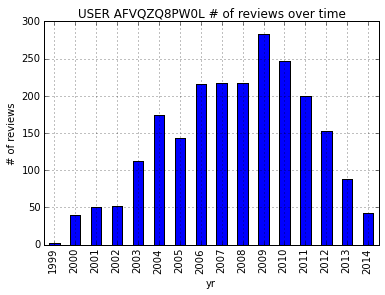

In [26]:
#top user reviews per year

top_user.groupby(['yr']).size().plot(kind = 'bar')
plt.ylabel('# of reviews')
plt.title('USER AFVQZQ8PW0L # of reviews over time')


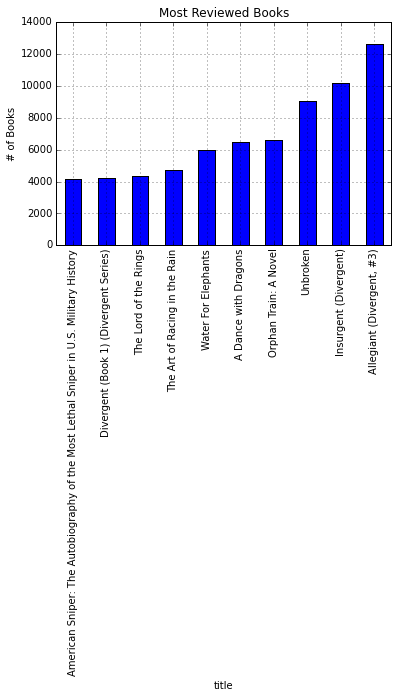

In [27]:
#most reviewed books 

df_reviews.groupby('title').size().order().tail(10).plot(kind='bar')
plt.title('Most Reviewed Books')
plt.ylabel('# of Books')

In [28]:
# Star ratings range from 1 to 5 in the dataset
print max(df_reviews['ReviewRating'])
print min(df_reviews['ReviewRating'])


5.0
1.0


In [15]:
# years range from 1996-2014
print max(df_reviews['yr'])
print min(df_reviews['yr'])

2014
1996


In [14]:
#separating positive and negative reviews into different dataframes 
#and plotting their word associations

df_reviews_positive = df_reviews[df_reviews['ReviewRating']>3]
len(df_reviews_positive)
df_reviews_positive.head()
#computing average price for books with positive reviews
print sum(df_reviews_positive['price'])/len(df_reviews_positive['price'])


8.77825020647


In [15]:
df_reviews_negative = df_reviews[df_reviews['ReviewRating']<=3]
len(df_reviews_negative)
#computing average price for books with negative reviews
print sum(df_reviews_negative['price'])/len(df_reviews_negative['price'])


8.62252667325


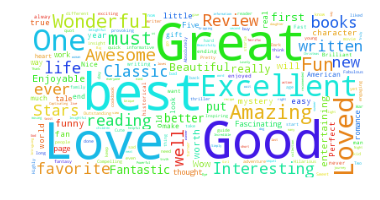

In [16]:
#generating positive reviews word cloud
positive_words = ' '.join(df_reviews_positive['RevSummary'])

more_stopwords = {'book','author','every','another','still','novel','fiction','history','story','read','serie','time','series'}
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
positive_cleaned_tags = " ".join([word for word in positive_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                     ).generate(positive_cleaned_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

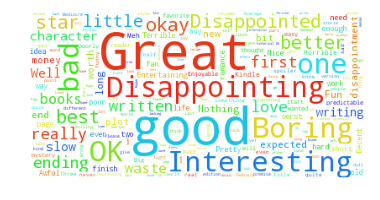

In [17]:
negative_words = ' '.join(df_reviews_negative['RevSummary'])

more_stopwords = {'book','author','every','another','still','novel','fiction','history','story','review','much','many','reading'}
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
negative_cleaned_tags = " ".join([word for word in negative_words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                     ).generate(negative_cleaned_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import *

In [19]:
#frequency distribution of positive reviews
long_words = [w.lower() for w in positive_words.split() if len(w) > 3 and w not in STOPWORDS]
fdist1 = FreqDist(long_words)
fdist1.most_common(20)

[('great', 86284),
 ('good', 45954),
 ('love', 25867),
 ('book', 24139),
 ('best', 20479),
 ('excellent', 18658),
 ('read', 18328),
 ('loved', 15776),
 ('book!', 15402),
 ('very', 12708),
 ('wonderful', 12623),
 ('this', 12477),
 ('amazing', 11717),
 ('must', 11108),
 ('read!', 10974),
 ('interesting', 9735),
 ('awesome', 9405),
 ('another', 9240),
 ('books', 7883),
 ('life', 7844)]

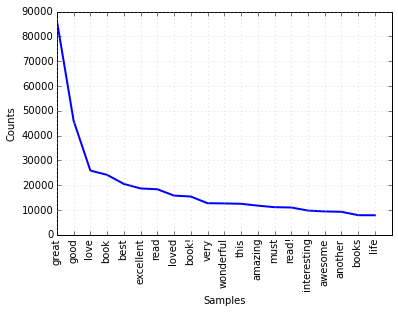

In [20]:
#chart of 20 most frequent words in positive reviews
fdist1.plot(20,cumulative=False) 

In [21]:
#listing  freq distribution of bigrams from positive reviews
fdist2= FreqDist(nltk.bigrams(w for w in positive_words.split()))
fdist2.most_common(20)

[(('of', 'the'), 16395),
 (('this', 'book'), 7412),
 (('Great', 'book'), 7089),
 (('One', 'of'), 6857),
 (('in', 'the'), 6387),
 (('is', 'a'), 5252),
 (('for', 'the'), 5199),
 (('of', 'a'), 4911),
 (('A', 'great'), 4812),
 (('to', 'the'), 4737),
 (('a', 'great'), 4737),
 (('the', 'best'), 4710),
 (('Great', 'Book'), 4401),
 (('great', 'book'), 4258),
 (('book', 'for'), 4013),
 (('put', 'it'), 3433),
 (('Great', 'read'), 3328),
 (('good', 'read'), 3301),
 (('to', 'read'), 3273),
 (('I', 'love'), 3079)]

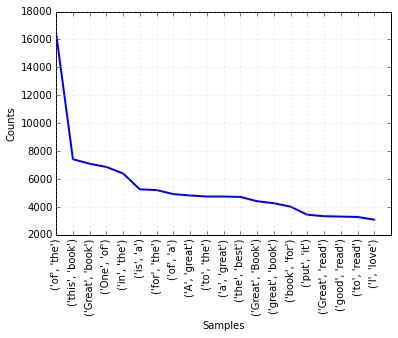

In [22]:
fdist2.plot(20, cumulative=False)

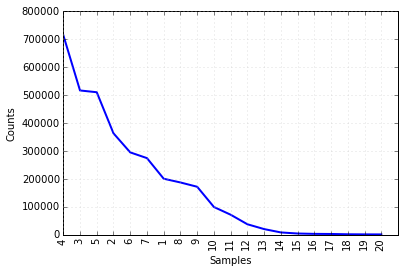

In [23]:
#word length plot for Positive Reviews
words = [len(w) for w in positive_words.split()]
fdist2 = FreqDist(words)
fdist2.plot(20,cumulative=False)


In [24]:
#review word count per year
df_reviews_positive['Rtags'] = df_reviews_positive['RevSummary'].str.split()
df_reviews_positive.head(10)

/Users/harshamallajosyula/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,categories,title,description,related,price,brand,helpful-score,helpful-max,yr,Rtags
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,[[Books]],Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",0.00,None,5,5,2002,"[Show, me, the, money!]"
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,[[Books]],Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None,10,10,2002,"[Not, a, Bad, Translation]"
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Not, the, large, print]"
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[I, was, disappointed, that, you, would, only,..."
5,A8ZS0I5L5V31B,0000013714,Ephraim O. Nwabuokei,"[0, 0]",I love this book. I love hymns and love to sin...,5,"03 1, 2014",GREAT HYMN BOOK!,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2014,"[GREAT, HYMN, BOOK!]"
6,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",We use this type of hymnal at church. I was l...,4,"12 3, 2013",Nice Hymnal,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Nice, Hymnal]"
7,A3BED5QFJWK88M,0000013714,jimedd,"[0, 0]",Heavenly Highway HymnsI ordered this hymnal be...,4,"10 16, 2012",Heavenly Highway Hymns,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2012,"[Heavenly, Highway, Hymns]"
8,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",I bought this for my husband who plays the pia...,5,"09 13, 2009",Heavenly Highway Hymns,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2,3,2009,"[Heavenly, Highway, Hymns]"
9,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",This is a large size hymn book which is great ...,5,"03 9, 2013",Awesome Hymn Book,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Awesome, Hymn, Book]"
10,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",We use this hymn book at the mission. It has ...,5,"01 2, 2012",Hand Clapping Toe Tapping Oldies,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,[[Books]],Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2012,"[Hand, Clapping, Toe, Tapping, Oldies]"


In [44]:
df_reviews_positive['Rtags-len']=df_reviews_positive['Rtags'].str.len()
df_reviews_positive.head(10)

/Users/harshamallajosyula/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,asin,reviewerName,helpful,reviewText,ReviewRating,reviewTime,RevSummary,salesRank,imUrl,...,title,description,related,price,brand,helpful-score,helpful-max,yr,Rtags,Rtags-len
0,AH2L9G3DQHHAJ,0000000116,chris,"[5, 5]",Interesting Grisham tale of a lawyer that take...,4,"04 27, 2002",Show me the money!,{u'Books': 10790794},http://ecx.images-amazon.com/images/I/51Rbg%2B...,...,Georgina Goodman Nelson Womens Size 8.5 Purple...,None,"{u'also_viewed': [u'B005U9T66K', u'B00602O7PG'...",0.00,None,5,5,2002,"[Show, me, the, money!]",4
2,A1TADCM7YWPQ8M,0000000868,Joel@AWS,"[10, 10]",I'll be honest. I work for a large online reta...,4,"09 11, 2002",Not a Bad Translation,{u'Books': 14161827},http://ecx.images-amazon.com/images/I/41K1RtF0...,...,Foot Rot of Piper nigrum. L. (Phytopathologica...,None,None,21.85,None,10,10,2002,"[Not, a, Bad, Translation]",4
3,AWGH7V0BDOJKB,0000013714,Barbara Marshall,"[0, 0]",It had all the songs I wanted but I had ordere...,4,"10 31, 2013",Not the large print,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Not, the, large, print]",4
4,A3UTQPQPM4TQO0,0000013714,betty burnett,"[0, 0]","We have many of the old, old issue. But the nu...",5,"07 27, 2013",I was disappointed that you would only allow m...,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[I, was, disappointed, that, you, would, only,...",21
5,A8ZS0I5L5V31B,0000013714,Ephraim O. Nwabuokei,"[0, 0]",I love this book. I love hymns and love to sin...,5,"03 1, 2014",GREAT HYMN BOOK!,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2014,"[GREAT, HYMN, BOOK!]",3
6,ACNGUPJ3A3TM9,0000013714,GCM,"[0, 0]",We use this type of hymnal at church. I was l...,4,"12 3, 2013",Nice Hymnal,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Nice, Hymnal]",2
7,A3BED5QFJWK88M,0000013714,jimedd,"[0, 0]",Heavenly Highway HymnsI ordered this hymnal be...,4,"10 16, 2012",Heavenly Highway Hymns,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2012,"[Heavenly, Highway, Hymns]",3
8,A2SUAM1J3GNN3B,0000013714,J. McDonald,"[2, 3]",I bought this for my husband who plays the pia...,5,"09 13, 2009",Heavenly Highway Hymns,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,2,3,2009,"[Heavenly, Highway, Hymns]",3
9,APOZ15IEYQRRR,0000013714,maewest64,"[0, 0]",This is a large size hymn book which is great ...,5,"03 9, 2013",Awesome Hymn Book,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2013,"[Awesome, Hymn, Book]",3
10,AYEDW3BFK53XK,0000013714,Missb,"[0, 0]",We use this hymn book at the mission. It has ...,5,"01 2, 2012",Hand Clapping Toe Tapping Oldies,{u'Books': 64393},http://ecx.images-amazon.com/images/I/51M1p2do...,...,Heavenly Highway Hymns: Shaped-Note Hymnal,None,"{u'also_bought': [u'0005080789', u'0005476798'...",8.09,None,0,0,2012,"[Hand, Clapping, Toe, Tapping, Oldies]",5


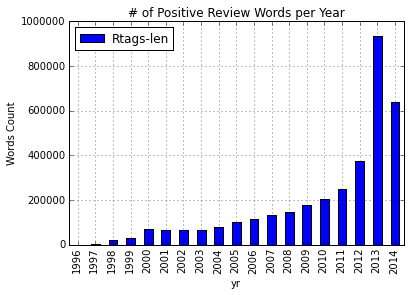

In [67]:
#plotting number of review words in the positive reviews df per each year
new_df = df_reviews_positive[['yr','Rtags-len']]
new_df.groupby('yr').sum().plot(kind='bar')
plt.title('# of Positive Review Words per Year')
plt.ylabel('Words Count')